In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [14]:
df=pd.read_csv("traffic_data.csv")
df.head()

,_id,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,...,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
1,2,1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,...,-79.952249,40.466157,Central Lawrenceville,7.0,9.0,42003090200,2.0,9.0,2.0,3-6
2,3,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,...,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
3,4,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,...,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
4,5,1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-80.019211,40.490794,Perry North,1.0,26.0,42003260200,1.0,26.0,1.0,1-15


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   _id                         420 non-null    int64  
 1   id                          420 non-null    int64  
 2   device_id                   420 non-null    int64  
 3   record_oid                  375 non-null    float64
 4   count_start_date            367 non-null    object 
 5   count_end_date              335 non-null    object 
 6   average_daily_car_traffic   286 non-null    float64
 7   average_daily_bike_traffic  7 non-null      float64
 8   counter_number              268 non-null    object 
 9   counter_type                364 non-null    object 
 10  speed_limit                 261 non-null    float64
 11  max_speed                   91 non-null     float64
 12  median_speed                298 non-null    float64
 13  percent_over_limit          241 non

In [16]:
columns_to_remove = ['max_speed', 'average_daily_car_traffic', 'average_daily_bike_traffic']
df = df.drop(columns=columns_to_remove)

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

categorical_columns = df.select_dtypes(include='object').columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

df.head()

,_id,id,device_id,record_oid,count_start_date,count_end_date,counter_number,counter_type,speed_limit,median_speed,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,6,StatTrak,25.000000,29.000000,...,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
1,2,1026101993,140,1.121444e+09,2019-01-24,2020-02-22,2,Intersection Study,25.229885,25.881879,...,-79.952249,40.466157,Central Lawrenceville,7.0,9.0,42003090200,2.0,9.0,2.0,3-6
2,3,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,2,StatTrak,35.000000,33.000000,...,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
3,4,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2,StatTrak,25.000000,28.000000,...,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
4,5,1039546167,144,1.083371e+09,2020-02-14,2020-02-22,2,StatTrak,25.229885,25.881879,...,-80.019211,40.490794,Perry North,1.0,26.0,42003260200,1.0,26.0,1.0,1-15


In [17]:
numeric_data = df.select_dtypes(include=['float64', 'int64']).dropna()
numeric_data

,_id,id,device_id,record_oid,speed_limit,median_speed,percent_over_limit,speed85_percent,speed95_percent,longitude,latitude,council_district,ward,tract,public_works_division,pli_division,police_zone
0,1,1011743669,85,1.445865e+09,25.000000,29.000000,77.000000,34.000000,37.000000,-79.967772,40.455733,7.0,6.0,42003060500,6.0,6.0,2.0
1,2,1026101993,140,1.121444e+09,25.229885,25.881879,49.493776,30.630233,34.457904,-79.952249,40.466157,7.0,9.0,42003090200,2.0,9.0,2.0
2,3,1032382575,11,1.539893e+09,35.000000,33.000000,28.000000,38.000000,41.000000,-80.076469,40.460717,2.0,28.0,42003563000,5.0,28.0,6.0
3,4,103627606,9,7.341951e+08,25.000000,28.000000,70.000000,31.000000,33.000000,-79.914335,40.437379,5.0,14.0,42003140800,3.0,14.0,4.0
4,5,1039546167,144,1.083371e+09,25.229885,25.881879,49.493776,30.630233,34.457904,-80.019211,40.490794,1.0,26.0,42003260200,1.0,26.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,1393,1132416719,434,1.083371e+09,25.229885,25.881879,49.493776,30.630233,34.457904,-80.009074,40.497196,1.0,26.0,42003261200,1.0,26.0,1.0
416,1394,1037219067,435,1.083371e+09,25.229885,25.881879,49.493776,30.630233,34.457904,-80.037771,40.482557,1.0,27.0,42003270100,1.0,27.0,1.0
417,1420,1329604877,436,1.001259e+09,25.000000,25.881879,49.493776,30.630233,34.457904,-79.960380,40.455057,6.0,5.0,42003050600,3.0,5.0,2.0
418,1421,704127706,437,1.832664e+09,25.000000,25.881879,49.493776,30.630233,34.457904,-79.966774,40.450147,6.0,5.0,42003050100,3.0,5.0,2.0


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.

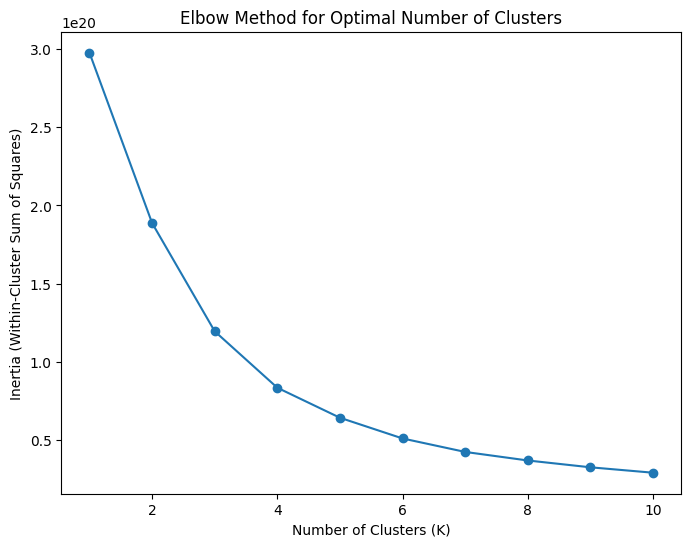

In [18]:
inertia = []

# Try different values of K (you can adjust the range)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numeric_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.show()


In [20]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(numeric_data)
silhouette = silhouette_score(numeric_data, df['kmeans_cluster'])
print(f"Silhouette Score for {optimal_k} Clusters: {silhouette}")


Silhouette Score for 3 Clusters: 0.3789954174753519


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    420 non-null    int64  
 1   id                     420 non-null    int64  
 2   device_id              420 non-null    int64  
 3   record_oid             420 non-null    float64
 4   count_start_date       420 non-null    object 
 5   count_end_date         420 non-null    object 
 6   counter_number         420 non-null    object 
 7   counter_type           420 non-null    object 
 8   speed_limit            420 non-null    float64
 9   median_speed           420 non-null    float64
 10  percent_over_limit     420 non-null    float64
 11  speed85_percent        420 non-null    float64
 12  speed95_percent        420 non-null    float64
 13  longitude              420 non-null    float64
 14  latitude               420 non-null    float64
 15  neighb

In [23]:
df_numeric = df.drop(['count_start_date', 'count_end_date', 'counter_number', 'counter_type', 'neighborhood', 'fire_zone'], axis=1)

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)


In [24]:
linkage_matrix = linkage(df_scaled, method='ward', metric='euclidean')


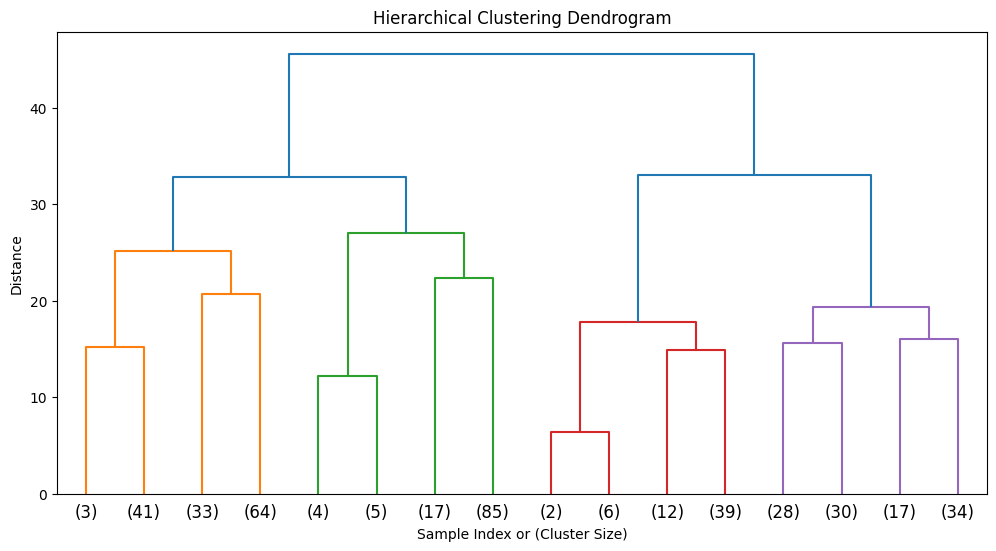

In [25]:
# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=3, show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.show()


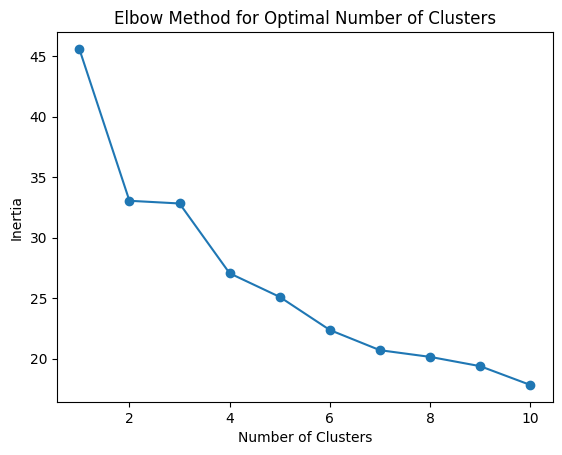

In [26]:
from scipy.cluster.hierarchy import fcluster

inertia = []

for k in range(1, 11):
    clusters = fcluster(linkage_matrix, k, criterion='maxclust')
    inertia.append(linkage_matrix[-k, 2])  # Height of the link to the k-th cluster

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [30]:
linkage_matrix = linkage(df_scaled, method='ward', metric='euclidean')
num_clusters = 3
clusters = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')
df['hierarchical_cluster'] = clusters


In [31]:
df['hierarchical_cluster'] = clusters
print("Hierarchical Silhouette Score:", silhouette_score(df_scaled, df['hierarchical_cluster']))
print(df.groupby('hierarchical_cluster').size())


Hierarchical Silhouette Score: 0.14614030207256093
hierarchical_cluster
1    252
2     59
3    109
dtype: int64


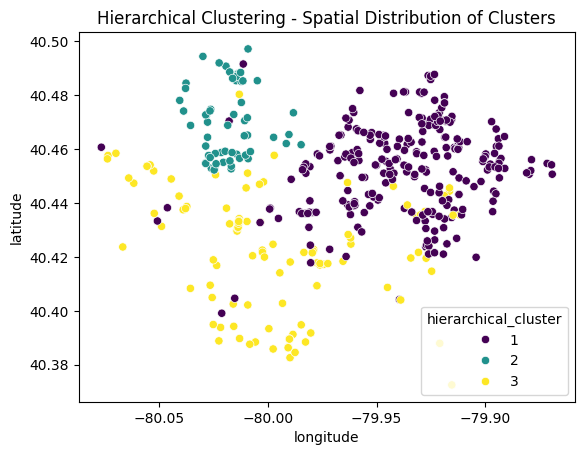

In [32]:
sns.scatterplot(x='longitude', y='latitude', hue='hierarchical_cluster', data=df, palette='viridis', legend='full')
plt.title('Hierarchical Clustering - Spatial Distribution of Clusters')
plt.show()


In [48]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.0001, min_samples=2)
data_for_clustering = df[['latitude', 'longitude']].values

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)


df['dbscan_cluster'] = dbscan.fit_predict(scaled_data)



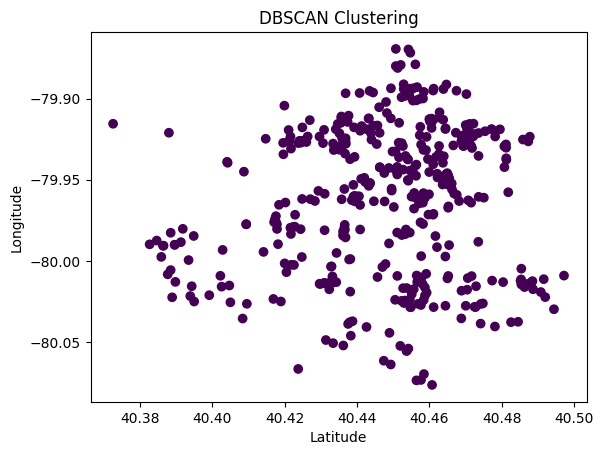

In [49]:
plt.scatter(df['latitude'], df['longitude'], c=df['dbscan_cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [53]:
# Check if there are more than one unique label
unique_labels = df['dbscan_cluster'].unique()

if len(unique_labels) > 1:
    # Compute the silhouette score
    silhouette_avg = silhouette_score(df_scaled, df['dbscan_cluster'])
    print(f"Silhouette Score for DBSCAN: {silhouette_avg}")
else:
    print("DBSCAN assigned only one label, unable to compute silhouette score.")

DBSCAN assigned only one label, unable to compute silhouette score.


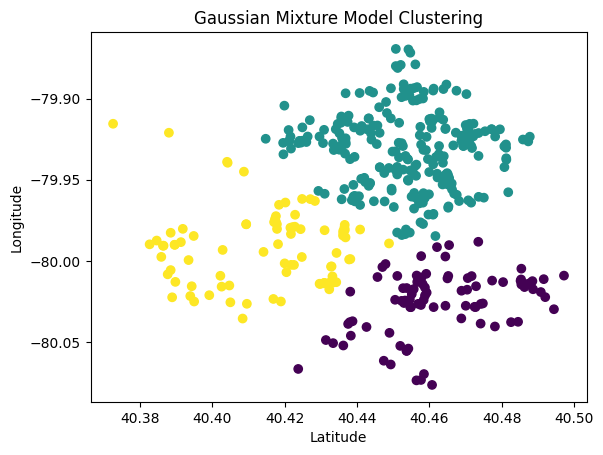

In [51]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)
df['gmm_cluster'] = gmm.fit_predict(scaled_data)

plt.scatter(df['latitude'], df['longitude'], c=df['gmm_cluster'], cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [52]:
silhouette_avg = silhouette_score(scaled_data, df['gmm_cluster'])
print(f"Silhouette Score for Gaussian Mixture Model: {silhouette_avg}")


Silhouette Score for Gaussian Mixture Model: 0.45559809509918775
